In [1]:
from chembl_webresource_client.new_client import new_client
import pandas as pd
import math
from rdkit.Chem import PandasTools

Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


In [2]:
targets = new_client.target
compounds = new_client.molecule
bioactivities = new_client.activity

In [24]:
uniprot_id = 'P01116'
# Get target information from ChEMBL but restrict to specified values only
target_P01116 = targets.get(target_components__accession=uniprot_id) \
                       .only('target_chembl_id', 'organism', 'pref_name', 'target_type')
print(type(target_P01116))
pd.DataFrame.from_records(target_P01116)

<class 'chembl_webresource_client.query_set.QuerySet'>


,organism,pref_name,target_chembl_id,target_type
0,Homo sapiens,GTPase KRas,CHEMBL2189121,SINGLE PROTEIN
1,Homo sapiens,GTPase KRas,CHEMBL2189121,SINGLE PROTEIN
2,Homo sapiens,PDE6D/KRAS,CHEMBL4523623,PROTEIN-PROTEIN INTERACTION
3,Homo sapiens,RAS,CHEMBL4524006,PROTEIN FAMILY
4,Homo sapiens,VHL/KRAS,CHEMBL5169273,PROTEIN-PROTEIN INTERACTION
5,Homo sapiens,GTPase KRas/RAF1,CHEMBL5291977,PROTEIN-PROTEIN INTERACTION
6,Homo sapiens,SOS1-KRAS,CHEMBL5465393,PROTEIN COMPLEX


In [25]:
target = target_P01116[0]
target

{'organism': 'Homo sapiens',
 'pref_name': 'GTPase KRas',
 'target_chembl_id': 'CHEMBL2189121',
 'target_type': 'SINGLE PROTEIN'}

In [26]:
chembl_id = target['target_chembl_id']
chembl_id

'CHEMBL2189121'

In [27]:
bioact = bioactivities.filter(target_chembl_id = chembl_id) \
                      .filter(type = 'IC50') \
                      .filter(relation = '=') \
                      .filter(assay_type = 'B') \
                      .only('activity_id','assay_chembl_id', 'assay_description', 'assay_type', \
                            'molecule_chembl_id', 'type', 'units', 'relation', 'value', \
                            'target_chembl_id', 'target_organism')
len(bioact), len(bioact[0]), type(bioact), type(bioact[0])

(799, 11, chembl_webresource_client.query_set.QuerySet, dict)

In [29]:
bioact[0]

{'activity_id': 13352855,
 'assay_chembl_id': 'CHEMBL2399318',
 'assay_description': 'Inhibition of full-length human KRas4B (amino acids 1 to 188)-SOS interaction assessed as inhibition of SOS-mediated nucleotide release activity',
 'assay_type': 'B',
 'molecule_chembl_id': 'CHEMBL2396992',
 'relation': '=',
 'target_chembl_id': 'CHEMBL2189121',
 'target_organism': 'Homo sapiens',
 'type': 'IC50',
 'units': 'uM',
 'value': '155.0'}

In [30]:
bioact_df = pd.DataFrame.from_records(bioact)
bioact_df.head(10)

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,target_chembl_id,target_organism,type,units,value
0,13352855,CHEMBL2399318,Inhibition of full-length human KRas4B (amino ...,B,CHEMBL2396992,=,CHEMBL2189121,Homo sapiens,IC50,uM,155.0
1,13352855,CHEMBL2399318,Inhibition of full-length human KRas4B (amino ...,B,CHEMBL2396992,=,CHEMBL2189121,Homo sapiens,IC50,uM,155.0
2,13352856,CHEMBL2399319,Inhibition of full-length human KRas4B (amino ...,B,CHEMBL2396992,=,CHEMBL2189121,Homo sapiens,IC50,uM,342.0
3,14548911,CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,CHEMBL3218635,=,CHEMBL2189121,Homo sapiens,IC50,uM,1.2
4,14548912,CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,CHEMBL3218636,=,CHEMBL2189121,Homo sapiens,IC50,uM,10.0
5,14548913,CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,CHEMBL3218637,=,CHEMBL2189121,Homo sapiens,IC50,uM,1.8
6,14548914,CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,CHEMBL3218638,=,CHEMBL2189121,Homo sapiens,IC50,uM,0.2
7,14548915,CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,CHEMBL3218639,=,CHEMBL2189121,Homo sapiens,IC50,uM,10.0
8,14548916,CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,CHEMBL3218640,=,CHEMBL2189121,Homo sapiens,IC50,uM,10.0
9,14548917,CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,CHEMBL3218641,=,CHEMBL2189121,Homo sapiens,IC50,uM,0.7


In [31]:
bioact_df.head()


,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,target_chembl_id,target_organism,type,units,value
0,13352855,CHEMBL2399318,Inhibition of full-length human KRas4B (amino ...,B,CHEMBL2396992,=,CHEMBL2189121,Homo sapiens,IC50,uM,155.0
1,13352855,CHEMBL2399318,Inhibition of full-length human KRas4B (amino ...,B,CHEMBL2396992,=,CHEMBL2189121,Homo sapiens,IC50,uM,155.0
2,13352856,CHEMBL2399319,Inhibition of full-length human KRas4B (amino ...,B,CHEMBL2396992,=,CHEMBL2189121,Homo sapiens,IC50,uM,342.0
3,14548911,CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,CHEMBL3218635,=,CHEMBL2189121,Homo sapiens,IC50,uM,1.2
4,14548912,CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,CHEMBL3218636,=,CHEMBL2189121,Homo sapiens,IC50,uM,10.0


In [32]:
bioact_df.shape

(800, 11)

In [33]:
bioact_df = bioact_df.dropna(axis=0, how = 'any')
bioact_df.shape

(800, 11)

In [34]:
bioact_df = bioact_df.drop_duplicates('molecule_chembl_id', keep = 'first')
bioact_df.shape

(569, 11)

In [35]:
print(bioact_df.units.unique())
bioact_df = bioact_df.drop(bioact_df.index[~bioact_df.units.str.contains('M')])
print(bioact_df.units.unique())
bioact_df.shape

['uM' 'nM']
['uM' 'nM']


(569, 11)

In [36]:
bioact_df = bioact_df.reset_index(drop=True) 
bioact_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,target_chembl_id,target_organism,type,units,value
0,13352855,CHEMBL2399318,Inhibition of full-length human KRas4B (amino ...,B,CHEMBL2396992,=,CHEMBL2189121,Homo sapiens,IC50,uM,155.0
1,14548911,CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,CHEMBL3218635,=,CHEMBL2189121,Homo sapiens,IC50,uM,1.2
2,14548912,CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,CHEMBL3218636,=,CHEMBL2189121,Homo sapiens,IC50,uM,10.0
3,14548913,CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,CHEMBL3218637,=,CHEMBL2189121,Homo sapiens,IC50,uM,1.8
4,14548914,CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,CHEMBL3218638,=,CHEMBL2189121,Homo sapiens,IC50,uM,0.2


In [37]:
def convert_to_NM(unit, bioactivity):
#     c=0
# for i, unit in enumerate(bioact_df.units):
    if unit != "nM":        
        if unit == "pM":
            value = float(bioactivity)/1000
        elif unit == "10'-11M":
            value = float(bioactivity)/100
        elif unit == "10'-10M":
            value = float(bioactivity)/10
        elif unit == "10'-8M":
            value = float(bioactivity)*10
        elif unit == "10'-1microM" or unit == "10'-7M":
            value = float(bioactivity)*100
        elif unit == "uM" or unit == "/uM" or unit == "10'-6M":
            value = float(bioactivity)*1000
        elif unit == "10'1 uM":
            value = float(bioactivity)*10000
        elif unit == "10'2 uM":
            value = float(bioactivity)*100000
        elif unit == "mM":
            value = float(bioactivity)*1000000
        elif unit == "M":
            value = float(bioactivity)*1000000000
        else:
            print ('unit not recognized...', unit)
        return value
    else: return bioactivity

In [38]:
bioactivity_nM = []
for i, row in bioact_df.iterrows():
    bioact_nM = convert_to_NM(row['units'], row['value'])
    bioactivity_nM.append(bioact_nM)
bioact_df['value'] = bioactivity_nM
bioact_df['units'] = 'nM'
bioact_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,target_chembl_id,target_organism,type,units,value
0,13352855,CHEMBL2399318,Inhibition of full-length human KRas4B (amino ...,B,CHEMBL2396992,=,CHEMBL2189121,Homo sapiens,IC50,nM,155000.0
1,14548911,CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,CHEMBL3218635,=,CHEMBL2189121,Homo sapiens,IC50,nM,1200.0
2,14548912,CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,CHEMBL3218636,=,CHEMBL2189121,Homo sapiens,IC50,nM,10000.0
3,14548913,CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,CHEMBL3218637,=,CHEMBL2189121,Homo sapiens,IC50,nM,1800.0
4,14548914,CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,CHEMBL3218638,=,CHEMBL2189121,Homo sapiens,IC50,nM,200.0


In [39]:
cmpd_id_list = list(bioact_df['molecule_chembl_id'])
compound_list = compounds.filter(molecule_chembl_id__in = cmpd_id_list) \
                         .only('molecule_chembl_id','molecule_structures')

In [40]:
compound_df = pd.DataFrame.from_records(compound_list)
compound_df = compound_df.drop_duplicates('molecule_chembl_id', keep = 'first')
print(compound_df.shape)
print(bioact_df.shape)
compound_df.head()

(569, 2)
(569, 11)


,molecule_chembl_id,molecule_structures
0,CHEMBL285848,{'canonical_smiles': 'CCCC[C@@H](C)/C=C(C)/C=C...
2,CHEMBL298734,{'canonical_smiles': 'NC(=O)N1CCC(CC(=O)N2CCC(...
3,CHEMBL62070,{'canonical_smiles': 'COc1cc(/C=C/C(=O)c2ccc(N...
4,CHEMBL59351,{'canonical_smiles': 'COc1cc(C(=O)/C=C/c2ccc([...
5,CHEMBL59026,{'canonical_smiles': 'COc1cc(/C=C/C(=O)c2ccc(F...


In [43]:
for i, cmpd in compound_df.iterrows():
    if compound_df.loc[i]['molecule_structures'] != None:
        compound_df.loc[i]['molecule_structures'] = cmpd['molecule_structures']['canonical_smiles']

print (compound_df.shape)

TypeError: string indices must be integers, not 'str'

In [44]:
for i, cmpd in compound_df.iterrows():
    mol_struct = cmpd['molecule_structures']
    if mol_struct and isinstance(mol_struct, dict):  # make sure it's a dict
        compound_df.loc[i, 'molecule_structures'] = mol_struct.get('canonical_smiles', None)


In [46]:
output_df = pd.merge(bioact_df[['molecule_chembl_id','units','value']], compound_df, on='molecule_chembl_id')
print(output_df.shape)
output_df.head()

(569, 4)


,molecule_chembl_id,units,value,molecule_structures
0,CHEMBL2396992,nM,155000.0,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN
1,CHEMBL3218635,nM,1200.0,CC(C)[C@@H]1NC(=O)[C@@H](CC(N)=O)NC(=O)[C@H](C...
2,CHEMBL3218636,nM,10000.0,CCCC[C@H]1NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[...
3,CHEMBL3218637,nM,1800.0,CC1(C)COC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC...
4,CHEMBL3218638,nM,200.0,CC(C)C[C@@H]1NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H...


In [47]:
output_df = output_df.rename(columns= {'molecule_structures':'smiles', 'value':'IC50'})
output_df.shape

(569, 4)

In [48]:
output_df = output_df[~output_df['smiles'].isnull()]
print(output_df.shape)
output_df.head()

(569, 4)


,molecule_chembl_id,units,IC50,smiles
0,CHEMBL2396992,nM,155000.0,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN
1,CHEMBL3218635,nM,1200.0,CC(C)[C@@H]1NC(=O)[C@@H](CC(N)=O)NC(=O)[C@H](C...
2,CHEMBL3218636,nM,10000.0,CCCC[C@H]1NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[...
3,CHEMBL3218637,nM,1800.0,CC1(C)COC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC...
4,CHEMBL3218638,nM,200.0,CC(C)C[C@@H]1NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H...


In [49]:
output_df = output_df.reset_index(drop=True)
ic50 = output_df.IC50.astype(float) 
print(len(ic50))
print(ic50.head(10))

569
0    155000.0
1      1200.0
2     10000.0
3      1800.0
4       200.0
5     10000.0
6     10000.0
7       700.0
8      1100.0
9      2000.0
Name: IC50, dtype: float64


In [50]:
# Convert IC50 to pIC50 and add pIC50 column:
pIC50 = pd.Series() 
i = 0
while i < len(output_df.IC50):
    value = 9 - math.log10(ic50[i]) # pIC50=-log10(IC50 mol/l) --> for nM: -log10(IC50*10**-9)= 9-log10(IC50)
    if value < 0:
        print("Negative pIC50 value at index"+str(i))
    pIC50.at[i] = value
    i += 1
    
output_df['pIC50'] = pIC50
output_df.head()

,molecule_chembl_id,units,IC50,smiles,pIC50
0,CHEMBL2396992,nM,155000.0,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,3.809668
1,CHEMBL3218635,nM,1200.0,CC(C)[C@@H]1NC(=O)[C@@H](CC(N)=O)NC(=O)[C@H](C...,5.920819
2,CHEMBL3218636,nM,10000.0,CCCC[C@H]1NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[...,5.000000
3,CHEMBL3218637,nM,1800.0,CC1(C)COC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC...,5.744727
4,CHEMBL3218638,nM,200.0,CC(C)C[C@@H]1NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H...,6.698970


In [53]:
import pandas as pd


from rdkit.Chem import PandasTools

PandasTools.AddMoleculeColumnToFrame(output_df, smilesCol='smiles', molCol='Molecule')

print(output_df.head())
print(type(output_df.loc[0, 'Molecule']))


Failed to patch pandas - unable to change molecule rendering


  molecule_chembl_id units      IC50  \
0      CHEMBL2396992    nM  155000.0   
1      CHEMBL3218635    nM    1200.0   
2      CHEMBL3218636    nM   10000.0   
3      CHEMBL3218637    nM    1800.0   
4      CHEMBL3218638    nM     200.0   

                                              smiles     pIC50  \
0                       Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN  3.809668   
1  CC(C)[C@@H]1NC(=O)[C@@H](CC(N)=O)NC(=O)[C@H](C...  5.920819   
2  CCCC[C@H]1NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[...  5.000000   
3  CC1(C)COC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC...  5.744727   
4  CC(C)C[C@@H]1NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H...  6.698970   

                                               ROMol  \
0  <rdkit.Chem.rdchem.Mol object at 0x0000024DD7F...   
1  <rdkit.Chem.rdchem.Mol object at 0x0000024DD7F...   
2  <rdkit.Chem.rdchem.Mol object at 0x0000024DD7F...   
3  <rdkit.Chem.rdchem.Mol object at 0x0000024DD7F...   
4  <rdkit.Chem.rdchem.Mol object at 0x0000024DD7F...   

                         

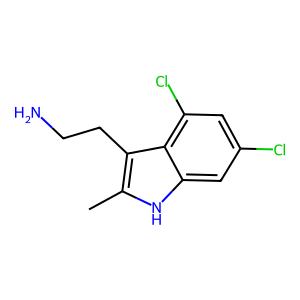

In [54]:
from rdkit.Chem import Draw

# Show the first molecule inline (only works in Jupyter)
Draw.MolToImage(output_df.loc[0, 'Molecule'])


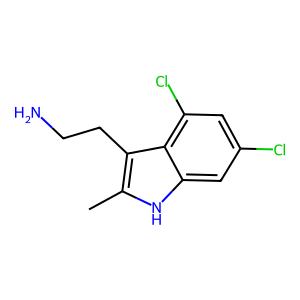

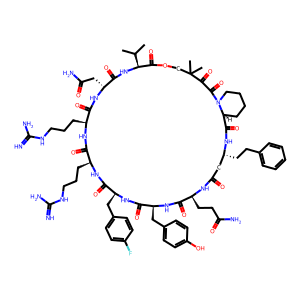

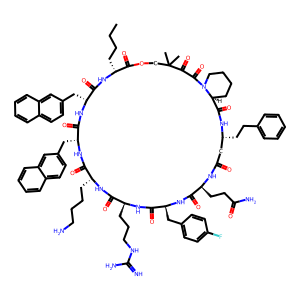

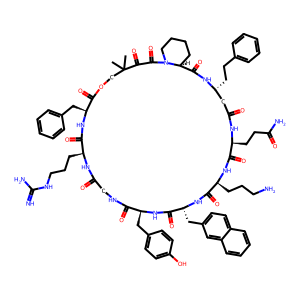

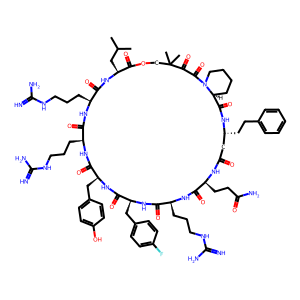

In [55]:
imgs = [Draw.MolToImage(mol) for mol in output_df['Molecule'].head(5)]
for img in imgs:
    display(img)


In [56]:
output_df.sort_values(by="pIC50", ascending=False, inplace=True)
output_df.reset_index(drop=True, inplace=True)

In [57]:
output_df.drop("smiles", axis=1).head()

,molecule_chembl_id,units,IC50,pIC50,ROMol,Molecule
0,CHEMBL4855757,nM,0.1,10.000000,<rdkit.Chem.rdchem.Mol object at 0x0000024DD80...,<rdkit.Chem.rdchem.Mol object at 0x0000024DD80...
1,CHEMBL4857438,nM,0.2,9.698970,<rdkit.Chem.rdchem.Mol object at 0x0000024DD80...,<rdkit.Chem.rdchem.Mol object at 0x0000024DD80...
2,CHEMBL4863339,nM,0.3,9.522879,<rdkit.Chem.rdchem.Mol object at 0x0000024DD80...,<rdkit.Chem.rdchem.Mol object at 0x0000024DD80...
3,CHEMBL4859236,nM,0.4,9.397940,<rdkit.Chem.rdchem.Mol object at 0x0000024DD80...,<rdkit.Chem.rdchem.Mol object at 0x0000024DD80...
4,CHEMBL4876040,nM,0.4,9.397940,<rdkit.Chem.rdchem.Mol object at 0x0000024DD80...,<rdkit.Chem.rdchem.Mol object at 0x0000024DD80...


In [58]:
import os
os.getcwd()

'C:\\Users\\sakthi'

In [59]:
os.chdir('C:\\Users\\sakthi')

In [60]:
import os

outname = '12dRAS.csv'

outdir = './hem'
if not os.path.exists(outdir):
    os.mkdir(outdir)

fullname = os.path.join(outdir, outname)    

output_df.to_csv

<bound method NDFrame.to_csv of     molecule_chembl_id units      IC50  \
0        CHEMBL4855757    nM       0.1   
1        CHEMBL4857438    nM       0.2   
2        CHEMBL4863339    nM       0.3   
3        CHEMBL4859236    nM       0.4   
4        CHEMBL4876040    nM       0.4   
..                 ...   ...       ...   
564      CHEMBL5082312    nM  100000.0   
565      CHEMBL5082248    nM  100000.0   
566      CHEMBL5078080    nM  100000.0   
567      CHEMBL4293433    nM  100000.0   
568      CHEMBL2396992    nM  155000.0   

                                                smiles      pIC50  \
0    Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCC45CCCN4C(C...  10.000000   
1    Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OC[C@@]45CCCN...   9.698970   
2    C#Cc1cccc2cc(O)cc(-c3ncc4c(N5CC6CCC(C5)N6)nc(O...   9.522879   
3    Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCC45CCCN4CCC...   9.397940   
4    C#Cc1cccc2cc(O)cc(-c3ncc4c(N5CC6CCC(C5)N6)nc(O...   9.397940   
..                                               

In [86]:
from rdkit import Chem
from rdkit.Chem import Descriptors

def lipinski_extended(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mw = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        hbd = Descriptors.NumHDonors(mol)
        hba = Descriptors.NumHAcceptors(mol)
        rot_bonds = Descriptors.NumRotatableBonds(mol)
        tpsa = Descriptors.TPSA(mol)
        
        # Count aromatic rings
        ri = mol.GetRingInfo()
        aromatic_rings = 0
        for ring in ri.BondRings():
            if all(mol.GetBondWithIdx(bidx).GetIsAromatic() for bidx in ring):
                aromatic_rings += 1
                
        return mw, logp, hbd, hba, rot_bonds, tpsa, aromatic_rings
    else:
        return (None,) * 7

# Apply to dataframe
lipinski_data = df["smiles"].apply(lipinski_extended)
df[["MW", "LogP", "HBD", "HBA", "RotB", "TPSA", "AromaticRings"]] = pd.DataFrame(lipinski_data.tolist(), index=df.index)

# Display
print(df[["molecule_chembl_id", "MW", "LogP", "HBD", "HBA", "RotB", "TPSA", "AromaticRings"]].head())


  molecule_chembl_id       MW    LogP  HBD  HBA  RotB   TPSA  AromaticRings
0      CHEMBL4855757  572.660  4.9756    2    8     6  86.64              4
1      CHEMBL4857438  593.078  5.2389    2    8     5  86.64              4
2      CHEMBL4863339  564.665  4.6188    2    8     5  86.64              4
3      CHEMBL4859236  575.088  5.2909    2    8     5  86.64              4
4      CHEMBL4876040  582.655  4.5668    2    8     5  86.64              4


In [87]:
from rdkit import Chem
from rdkit.Chem import Descriptors

def lipinski_extended(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mw = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        hbd = Descriptors.NumHDonors(mol)
        hba = Descriptors.NumHAcceptors(mol)
        rot_bonds = Descriptors.NumRotatableBonds(mol)
        tpsa = Descriptors.TPSA(mol)
        
        # Count aromatic rings
        ri = mol.GetRingInfo()
        aromatic_rings = 0
        for ring in ri.BondRings():
            if all(mol.GetBondWithIdx(bidx).GetIsAromatic() for bidx in ring):
                aromatic_rings += 1
                
        return mw, logp, hbd, hba, rot_bonds, tpsa, aromatic_rings
    else:
        return (None,) * 7

# Apply to dataframe
lipinski_data = df["smiles"].apply(lipinski_extended)
df[["MW", "LogP", "HBD", "HBA", "RotB", "TPSA", "AromaticRings"]] = pd.DataFrame(lipinski_data.tolist(), index=df.index)

# Display
print(df[["molecule_chembl_id", "MW", "LogP", "HBD", "HBA", "RotB", "TPSA", "AromaticRings"]].head())


  molecule_chembl_id       MW    LogP  HBD  HBA  RotB   TPSA  AromaticRings
0      CHEMBL4855757  572.660  4.9756    2    8     6  86.64              4
1      CHEMBL4857438  593.078  5.2389    2    8     5  86.64              4
2      CHEMBL4863339  564.665  4.6188    2    8     5  86.64              4
3      CHEMBL4859236  575.088  5.2909    2    8     5  86.64              4
4      CHEMBL4876040  582.655  4.5668    2    8     5  86.64              4


    molecule_chembl_id        MW      LogP  HBD  HBA units     IC50  \
529      CHEMBL4060952  2665.213  -9.88664   46   34    nM  31000.0   
451      CHEMBL4089137  2656.118 -12.71884   47   36    nM   3920.0   
415      CHEMBL4099289  2603.142 -11.19674   46   34    nM   2010.0   
333      CHEMBL4081270  2589.115 -11.58684   46   34    nM    655.0   
292      CHEMBL4091553  2575.088 -11.62934   46   34    nM    439.0   
157      CHEMBL4072295  2561.061 -11.67184   46   34    nM     42.0   
191      CHEMBL4082777  2561.061 -11.67184   46   34    nM     82.0   
443      CHEMBL4872056  2550.759  -3.96733   37   29    nM   3400.0   
351      CHEMBL4081818  2545.062 -10.64424   45   33    nM    764.0   
350      CHEMBL4075048  2535.023 -12.15814   47   34    nM    763.0   

                                                smiles     pIC50  \
529  CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...  4.508638   
451  CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...  5.406714   
415  CC[C@H](C

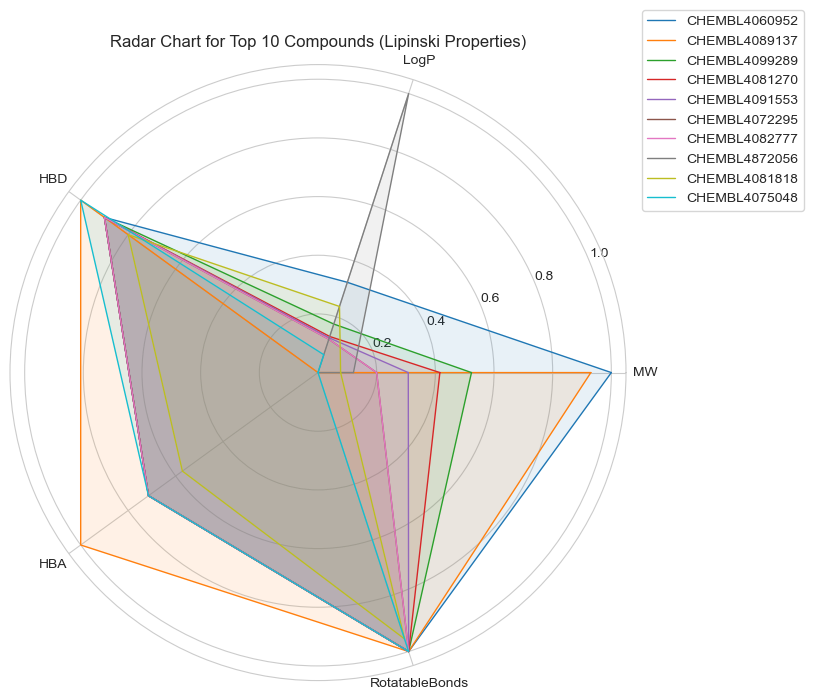

<Figure size 640x480 with 0 Axes>

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Select the top 10 compounds based on Molecular Weight (MW)
top_10 = df.nlargest(10, "MW").dropna(subset=["MW", "LogP", "HBD", "HBA"])

# Print data to debug
print(top_10)

# Define the properties for the radar chart
labels = ["MW", "LogP", "HBD", "HBA", "RotatableBonds"]
num_vars = len(labels)

# Normalize data (avoid division by zero)
top_10_norm = top_10[labels].apply(lambda x: (x - x.min()) / (x.max() - x.min() + 1e-8))

# Reset index to avoid out-of-bounds errors
top_10 = top_10.reset_index(drop=True)
top_10_norm = top_10_norm.reset_index(drop=True)

# Create angles for the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

# Plot radar chart for each compound
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for idx, row in top_10_norm.iterrows():
    values = row.tolist()
    values += values[:1]  # Close the shape

    if np.any(np.isnan(values)):  # Check if any values are NaN
        print(f"Skipping {top_10.iloc[idx]['molecule_chembl_id']} due to NaN values")
        continue  # Skip if NaN values exist

    ax.plot(angles, values, linewidth=1, linestyle="solid", label=top_10.iloc[idx]["molecule_chembl_id"])
    ax.fill(angles, values, alpha=0.1)  # Fill color

# Add labels and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title("Radar Chart for Top 10 Compounds (Lipinski Properties)")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

# Save the image
plt.savefig("radar_chart.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

plt.savefig("radar_chart.png", dpi=300, bbox_inches="tight", transparent=True)

fig.savefig("radar_chart_fixed.png", dpi=300, bbox_inches="tight")
fig.savefig("radar_chart_fixed.pdf", dpi=300, bbox_inches="tight")


In [155]:
cd ..

C:\Users\sakthi\hem


In [157]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs

# === Edit this part ===
reference_smiles = "C#CC1=C(C=CC2=CC(=CC(=C21)C3=NC=C4C(=C3F)N=C(N=C4N5CC6CCC(C5)N6)OC[C@@]78CCCN7C[C@@H](C8)F)O)F"  # <-- sotorasib SMILES
csv_file = "lipinskiras.csv"       # <-- your input .csv file
smiles_column = "smiles"           # <-- column name in your CSV with SMILES
similarity_cutoff = 0.80
# =======================

# Prepare reference fingerprint
ref_mol = Chem.MolFromSmiles(reference_smiles)
ref_fp = AllChem.GetMorganFingerprintAsBitVect(ref_mol, 2, nBits=2048)

# Load SMILES from CSV
df = pd.read_csv(csv_file)

# Store results
similar_rows = []

# Calculate similarity for each row
for idx, row in df.iterrows():
    smi = row[smiles_column]
    mol = Chem.MolFromSmiles(smi)
    if mol:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        sim = DataStructs.TanimotoSimilarity(ref_fp, fp)
        if sim >= similarity_cutoff:
            row_data = row.to_dict()
            row_data["Tanimoto"] = round(sim, 3)
            similar_rows.append(row_data)

# Output similar molecules
similar_df = pd.DataFrame(similar_rows)
print(similar_df)

# Optional: Save to new file
similar_df.to_csv("12dsimilarity_filtered.csv", index=False)


  molecule_chembl_id       MW    LogP  HBD  HBA units  IC50  \
0      CHEMBL4876040  582.655  4.5668    2    8    nM   0.4   
1      CHEMBL4858364  600.645  4.7059    2    8    nM   0.4   
2      CHEMBL4867851  582.655  4.7579    2    8    nM   0.6   
3      CHEMBL4874297  594.613  4.8637    2    8    nM   0.6   
4      CHEMBL4863371  604.677  5.2870    2    8    nM   0.8   
5      CHEMBL5081048  600.645  4.7059    2    8    nM   2.0   
6      CHEMBL5428155  599.657  5.3109    2    7    nM   7.9   

                                              smiles     pIC50  Tanimoto  
0  C#Cc1cccc2cc(O)cc(-c3ncc4c(N5CC6CCC(C5)N6)nc(O...  9.397940     0.844  
1  C#Cc1c(F)ccc2cc(O)cc(-c3ncc4c(N5CC6CCC(C5)N6)n...  9.397940     1.000  
2  C#Cc1c(F)ccc2cc(O)cc(-c3ncc4c(N5CC6CCC(C5)N6)n...  9.221849     0.882  
3  Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OC[C@@]45CCCN...  9.221849     0.860  
4  CCc1c(F)ccc2cc(O)cc(-c3ncc4c(N5CC6CCC(C5)N6)nc...  9.096910     0.813  
5  C#Cc1c(F)ccc2cc(O)cc(-c3ncc4c(N5C[C@H]6CC[

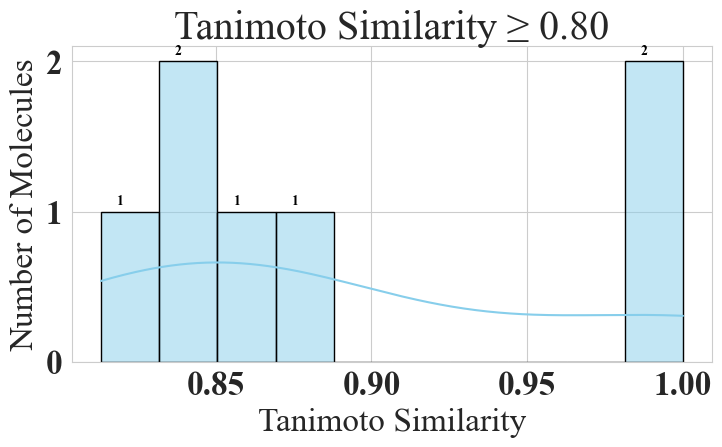

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem

# Calculate Tanimoto similarity
similarities = []
for smi in df["smiles"]:
    mol = Chem.MolFromSmiles(smi)
    if mol:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
        sim = DataStructs.TanimotoSimilarity(ref_fp, fp)
        if sim >= 0.80:
            similarities.append(sim)

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(similarities, bins=10, kde=True, color="skyblue", edgecolor="black")

# Add count labels on top of bars
counts, bins, _ = plt.hist(similarities, bins=10, alpha=0)
for count, x in zip(counts, bins[:-1]):
    if count > 0:
        plt.text(x + 0.005, count + 0.05, str(int(count)), fontsize=10, color='black')

plt.title("Tanimoto Similarity ≥ 0.80")
plt.xlabel("Tanimoto Similarity")
plt.ylabel("Number of Molecules")
plt.tight_layout()

# Save figure
plt.savefig("tanimoto_similarity_histogram.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()


             #Fingerprints

#t007

In [95]:
# Read data from previous talktorials
chembl_df = pd.read_csv("lipinskiras12.csv")
      

# Look at head
print("Shape of dataframe : ", chembl_df.shape)
chembl_df.head()
# NBVAL_CHECK_OUTPUT

Shape of dataframe :  (569, 13)


,molecule_chembl_id,MW,LogP,HBD,HBA,RotB,TPSA,AromaticRings,units,IC50,smiles,pIC50,Molecule
0,CHEMBL4855757,572.660,4.9756,2,8,6,86.64,4,nM,0.1,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCC45CCCN4C(C...,10.000000,<rdkit.Chem.rdchem.Mol object at 0x0000024DD80...
1,CHEMBL4857438,593.078,5.2389,2,8,5,86.64,4,nM,0.2,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OC[C@@]45CCCN...,9.698970,<rdkit.Chem.rdchem.Mol object at 0x0000024DD80...
2,CHEMBL4863339,564.665,4.6188,2,8,5,86.64,4,nM,0.3,C#Cc1cccc2cc(O)cc(-c3ncc4c(N5CC6CCC(C5)N6)nc(O...,9.522879,<rdkit.Chem.rdchem.Mol object at 0x0000024DD80...
3,CHEMBL4859236,575.088,5.2909,2,8,5,86.64,4,nM,0.4,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCC45CCCN4CCC...,9.397940,<rdkit.Chem.rdchem.Mol object at 0x0000024DD80...
4,CHEMBL4876040,582.655,4.5668,2,8,5,86.64,4,nM,0.4,C#Cc1cccc2cc(O)cc(-c3ncc4c(N5CC6CCC(C5)N6)nc(O...,9.397940,<rdkit.Chem.rdchem.Mol object at 0x0000024DD80...


In [97]:
# Add column for activity
chembl_df["active"] = np.zeros(len(chembl_df))

# Mark every molecule as active with an pIC50 of >= 6.3, 0 otherwise
chembl_df.loc[chembl_df[chembl_df.pIC50 >= 6.3].index, "active"] = 1.0

# NBVAL_CHECK_OUTPUT
print("Number of active compounds:", int(chembl_df.active.sum()))
print("Number of inactive compounds:", len(chembl_df) - int(chembl_df.active.sum()))

Number of active compounds: 305
Number of inactive compounds: 264


In [170]:
cd sakthi/

C:\Users\sakthi


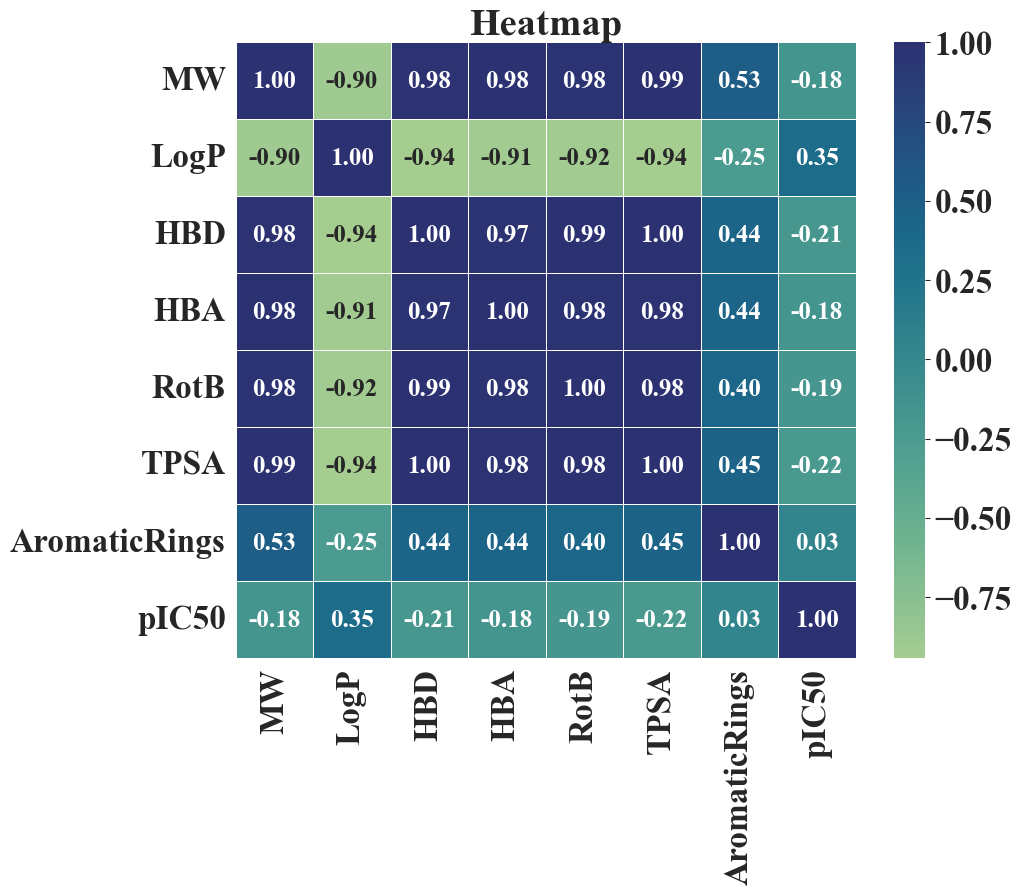

In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("active_cmpds12d.csv")  # Replace with your actual file

# Select the relevant properties
properties = ["MW", "LogP", "HBD", "HBA", "RotB", "TPSA", "AromaticRings", "pIC50"]

# Compute Pearson correlation matrix
correlation_matrix = df[properties].corr(method="pearson")

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    annot_kws={"size": 18},  # <-- Value size
    cmap="crest",
    fmt=".2f",
    linewidths=0.5
)

# Title
plt.title("Heatmap", fontsize=28, fontweight='bold')
plt.savefig("pearson_correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\sakthi\AppData\Local\Temp\ipykernel_10172\3399787292.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')


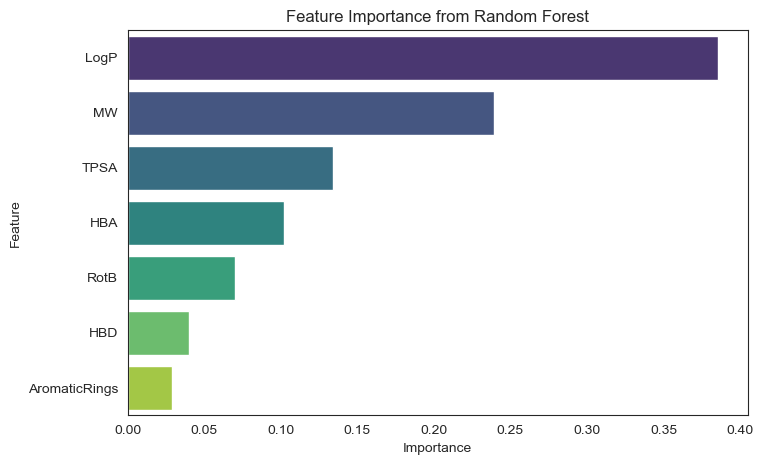

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define features and target
X = df[properties[:-1]]  # all features except 'pIC50'
y = df["pIC50"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a dataframe for visualization
feat_importance_df = pd.DataFrame({
    'Feature': properties[:-1],
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.show()


In [153]:
from rdkit import Chem
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
import numpy as np

def smiles_to_morgan_fp(smiles, radius=2, n_bits=2048):
    """
    Convert a SMILES string into a Morgan fingerprint (ECFP).

    Parameters
    ----------
    smiles : str
        The SMILES string defining the molecule.

    radius : int, optional (default=2)
        The radius of the Morgan fingerprint. 
        - Radius=2 → ECFP4 
        - Radius=3 → ECFP6

    n_bits : int, optional (default=2048)
        The size of the fingerprint.

    Returns
    -------
    np.array or None
        The fingerprint as a NumPy array, or None if SMILES conversion fails.
    """

    # Convert SMILES to RDKit Mol object
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        print(f"Error: Invalid SMILES '{smiles}'")
        return None

    # Generate Morgan fingerprint
    fpg = GetMorganGenerator(radius=radius, fpSize=n_bits)
    return np.array(fpg.GetFingerprint(mol))


In [154]:
compound_df = chembl_df.copy()

In [155]:
# Add column for fingerprint
compound_df["fp"] = compound_df["smiles"].apply(smiles_to_fp)
compound_df.head(3)
# NBVAL_CHECK_OUTPUT

,molecule_chembl_id,MW,LogP,HBD,HBA,units,IC50,smiles,pIC50,active,fp
0,CHEMBL4855757,572.660,4.9756,2,8,nM,0.1,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCC45CCCN4C(C...,10.000000,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CHEMBL4857438,593.078,5.2389,2,8,nM,0.2,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OC[C@@]45CCCN...,9.698970,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CHEMBL4863339,564.665,4.6188,2,8,nM,0.3,C#Cc1cccc2cc(O)cc(-c3ncc4c(N5CC6CCC(C5)N6)nc(O...,9.522879,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [26]:
pwd

'C:\\Users\\sakthi\\hem'

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("activity_summary.csv")  # Replace with actual filename

# Define features (X) and target (y)
X = df.drop(columns=["MW"])  # Drop target column
y = df["active"]  # Target variable

# Split data: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save training data
train_df = pd.concat([X_train, y_train], axis=1)
train_df.to_csv("training_data.csv", index=False)

# Save testing data
test_df = pd.concat([X_test, y_test], axis=1)
test_df.to_csv("testing_data.csv", index=False)

print("Training and testing datasets saved successfully!")


Training and testing datasets saved successfully!


In [28]:
print("training_data size:", len(X_train))
print("test_data size:", len(y_test))

training_data size: 244
test_data size: 61


In [9]:
pip install lightgbm



   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 660.6 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.5 MB 1.7 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.5 MB 4.5 MB/s eta 0:00:01
   ----------------------------------- ---- 1.3/1.5 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.5 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.5 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.4 MB/s eta 0:00:00


In [19]:
pip install rdkit pandas scikit-learn xgboost


Note: you may need to restart the kernel to use updated packages.


In [2]:
cd hem/

C:\Users\sakthi\hem


  molecule_chembl_id       MW    LogP  HBD  HBA  RB  \
0      CHEMBL4855757  572.660  4.9756    2    8   6   
1      CHEMBL4857438  593.078  5.2389    2    8   5   
2      CHEMBL4863339  564.665  4.6188    2    8   5   
3      CHEMBL4859236  575.088  5.2909    2    8   5   
4      CHEMBL4876040  582.655  4.5668    2    8   5   

                                              smiles      pIC50  activity  
0  Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCC45CCCN4C(C...  10.000000         1  
1  Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OC[C@@]45CCCN...   9.698970         1  
2  C#Cc1cccc2cc(O)cc(-c3ncc4c(N5CC6CCC(C5)N6)nc(O...   9.522879         1  
3  Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCC45CCCN4CCC...   9.397940         1  
4  C#Cc1cccc2cc(O)cc(-c3ncc4c(N5CC6CCC(C5)N6)nc(O...   9.397940         1  
Training Logistic Regression...
Logistic Regression - Accuracy: 0.8421, AUC: 0.8393
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        52
           1       0

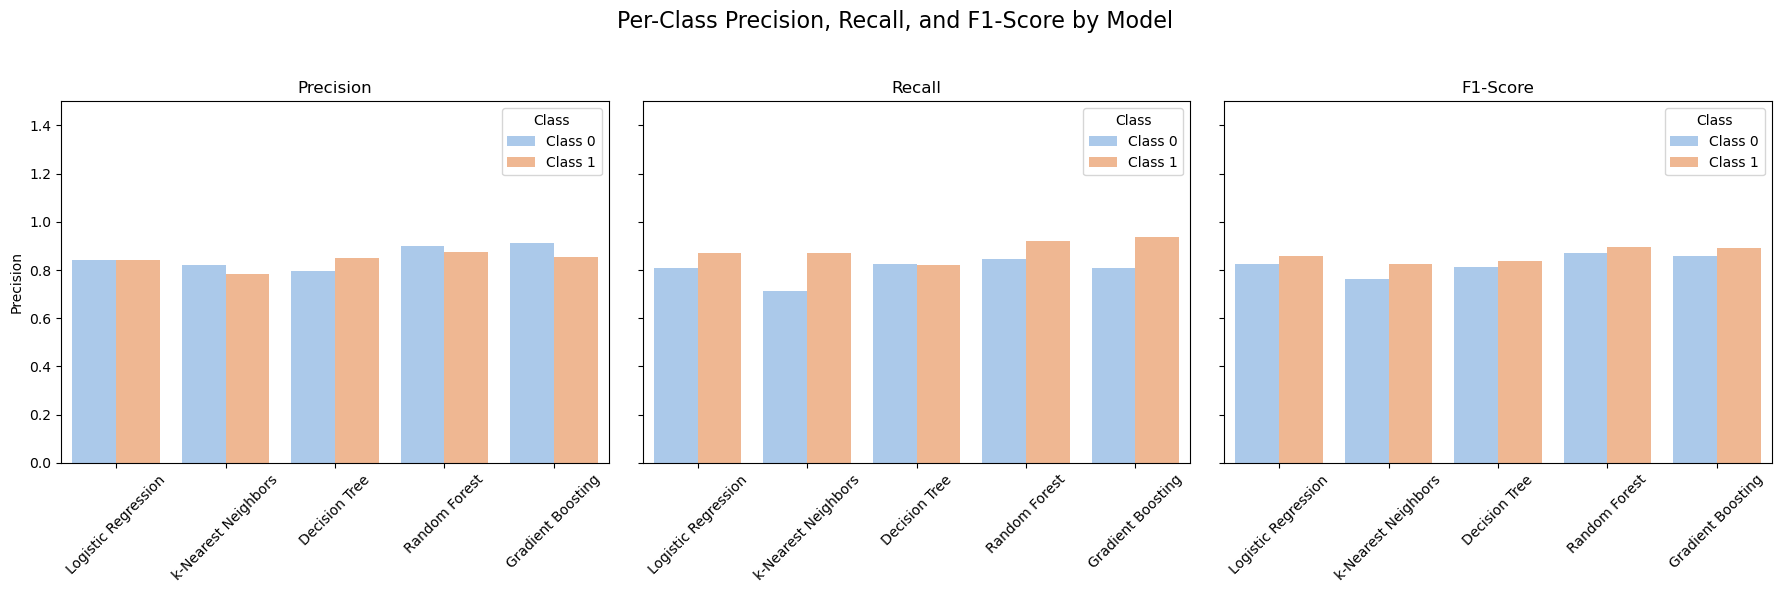

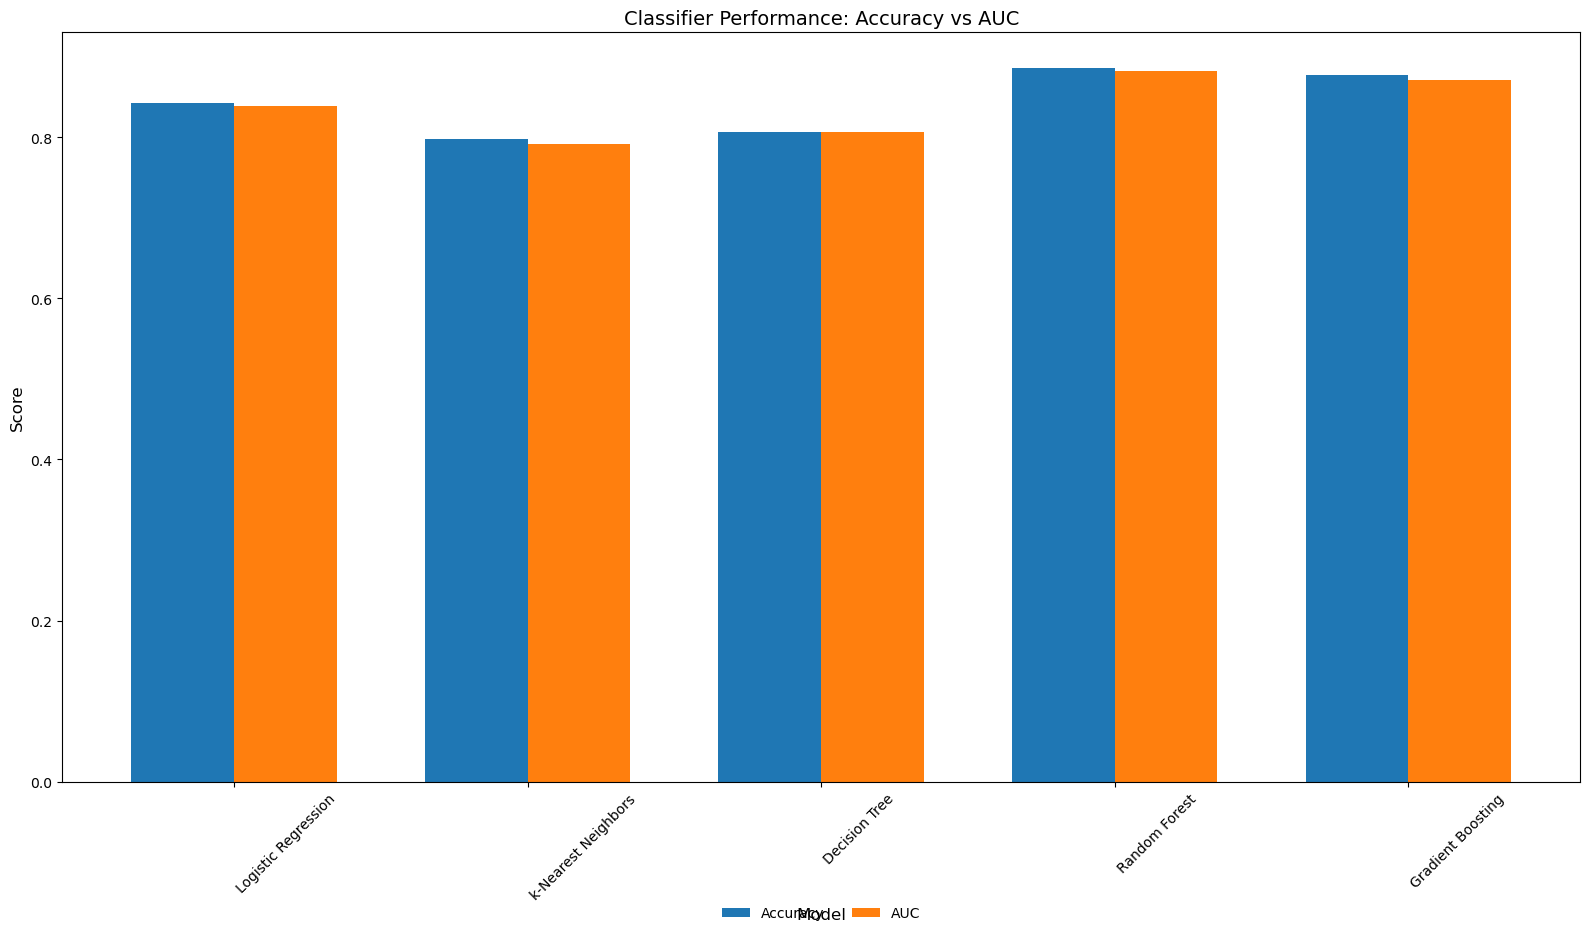

In [10]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, Descriptors
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprintAsBitVect
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load dataset
df = pd.read_csv("active_cmpds1.csv")

# Check column names
print(df.head())

# Ensure your dataset has 'smiles' and 'activity' columns
SMILES_COLUMN = "smiles"  # Change if different in your dataset
LABEL_COLUMN = "activity"  # Change if different in your dataset

# Convert SMILES to molecular fingerprints
def smiles_to_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)  # Morgan fingerprint
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

# Apply fingerprinting to dataset
df["fingerprint"] = df[SMILES_COLUMN].apply(smiles_to_fingerprint)
df = df.dropna(subset=["fingerprint"])  # Remove invalid SMILES
X = np.vstack(df["fingerprint"].values)  # Feature matrix
y = df[LABEL_COLUMN].values  # Labels

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for LR and kNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.4f}, AUC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    

import matplotlib.pyplot as plt

# Store results for plotting
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results.append((name, accuracy, roc_auc))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "AUC"])

# Extended metrics storage
detailed_metrics = {
    "Model": [],
    "Class": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

from sklearn.metrics import classification_report

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    for cls in ["0", "1"]:
        detailed_metrics["Model"].append(name)
        detailed_metrics["Class"].append(f"Class {cls}")
        detailed_metrics["Precision"].append(report[cls]["precision"])
        detailed_metrics["Recall"].append(report[cls]["recall"])
        detailed_metrics["F1-Score"].append(report[cls]["f1-score"])

# Convert to DataFrame and save
detailed_df = pd.DataFrame(detailed_metrics)
detailed_df.to_csv("classification_report_detailed.csv", index=False)
print("✅ Saved to 'classification_report_detailed.csv'")

# Plotting all metrics
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
metrics = ["Precision", "Recall", "F1-Score"]
colors = ["#66c2a5", "#fc8d62", "#8da0cb"]

for ax, metric, color in zip(axes, metrics, colors):
    sns.barplot(data=detailed_df, x="Model", y=metric, hue="Class", ax=ax, palette="pastel")
    ax.set_title(metric)
    ax.set_ylim(0, 1.5)
    ax.set_ylabel(metric)
    ax.set_xlabel("")
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title="Class")

fig.suptitle("Per-Class Precision, Recall, and F1-Score by Model", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("classification_report_metrics.png", dpi=300)
plt.show()


# Plot Accuracy and AUC
fig, ax = plt.subplots(figsize=(16, 10))
bar_width = 0.35
x = np.arange(len(results_df["Model"]))

# Bars
acc_bars = ax.bar(x - bar_width/2, results_df["Accuracy"], bar_width, label="Accuracy", color="#1f77b4")
auc_bars = ax.bar(x + bar_width/2, results_df["AUC"], bar_width, label="AUC", color="#ff7f0e")

# Title and Labels
ax.set_xlabel("Model", fontsize=12)
ax.set_ylabel("Score", fontsize=12)
ax.set_title("Classifier Performance: Accuracy vs AUC", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(results_df["Model"], rotation=45, ha="left")

# Legend placed below to avoid overlap
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("accuracy_auc_comparison.png", dpi=300)
plt.show()


In [148]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
import numpy as np

# Define your models (replace X, y with your data)
# Load dataset
df = pd.read_csv("active_cmpds1.csv")

# Check column names
print(df.head())

# Ensure your dataset has 'smiles' and 'activity' columns
SMILES_COLUMN = "smiles"  # Change if different in your dataset
LABEL_COLUMN = "activity"  # Change if different in your dataset

# Convert SMILES to molecular fingerprints
def smiles_to_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)  # Morgan fingerprint
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

# Apply fingerprinting to dataset
df["fingerprint"] = df[SMILES_COLUMN].apply(smiles_to_fingerprint)
df = df.dropna(subset=["fingerprint"])  # Remove invalid SMILES
X = np.vstack(df["fingerprint"].values)  # Feature matrix
y = df[LABEL_COLUMN].values  # Labels


models = {
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'k-Nearest Neighbors': make_pipeline(StandardScaler(), KNeighborsClassifier()),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\n### 10-Fold CV results for {name} ###")
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=False)
    
    for metric in scoring.keys():
        fold_scores = scores[f'test_{metric}']
        print(f"{metric.capitalize()} scores per fold: {np.round(fold_scores, 3)}")
        print(f"Mean {metric}: {fold_scores.mean():.4f}, Std: {fold_scores.std():.4f}")


  molecule_chembl_id       MW    LogP  HBD  HBA  RB  \
0      CHEMBL4855757  572.660  4.9756    2    8   6   
1      CHEMBL4857438  593.078  5.2389    2    8   5   
2      CHEMBL4863339  564.665  4.6188    2    8   5   
3      CHEMBL4859236  575.088  5.2909    2    8   5   
4      CHEMBL4876040  582.655  4.5668    2    8   5   

                                              smiles      pIC50  activity  
0  Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCC45CCCN4C(C...  10.000000         1  
1  Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OC[C@@]45CCCN...   9.698970         1  
2  C#Cc1cccc2cc(O)cc(-c3ncc4c(N5CC6CCC(C5)N6)nc(O...   9.522879         1  
3  Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCC45CCCN4CCC...   9.397940         1  
4  C#Cc1cccc2cc(O)cc(-c3ncc4c(N5CC6CCC(C5)N6)nc(O...   9.397940         1  

### 10-Fold CV results for Logistic Regression ###
Accuracy scores per fold: [0.807 0.825 0.86  0.86  0.825 0.842 0.895 0.789 0.86  0.821]
Mean accuracy: 0.8383, Std: 0.0293
Precision scores per fold: [0.885 0.8 

                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.838283   0.832373  0.878817  0.853246
1  k-Nearest Neighbors  0.831266   0.820577  0.892258  0.850210
2        Decision Tree  0.811873   0.816106  0.839247  0.826423
3        Random Forest  0.855858   0.851280  0.888387  0.868677
4    Gradient Boosting  0.841823   0.838578  0.875376  0.855553


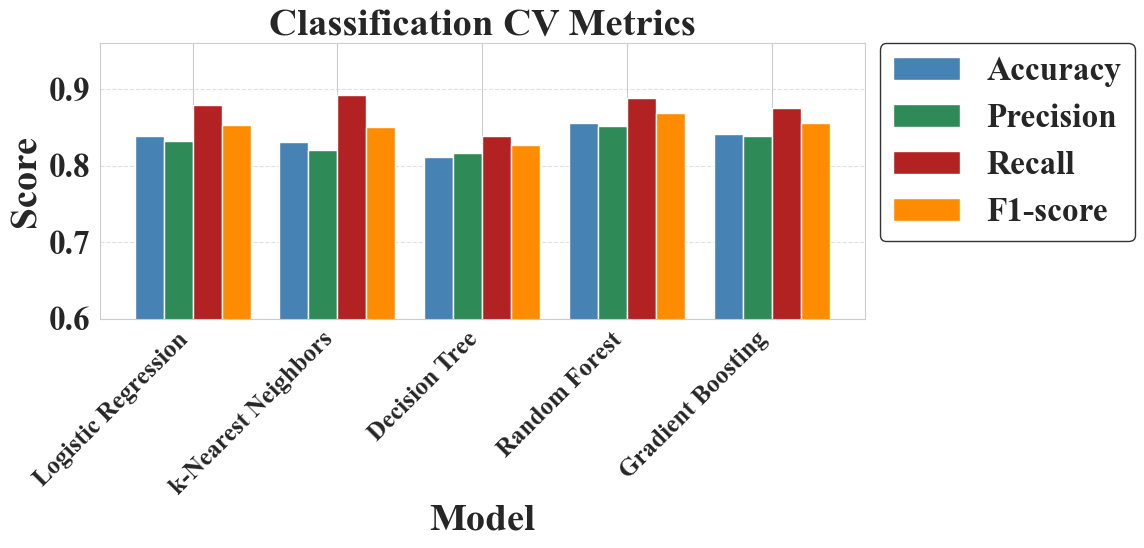

In [149]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Prepare results for plotting
results_plot = []

for name, model in models.items():
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=False)
    results_plot.append({
        "Model": name,
        "Accuracy": scores['test_accuracy'].mean(),
        "Precision": scores['test_precision'].mean(),
        "Recall": scores['test_recall'].mean(),
        "F1-score": scores['test_f1'].mean()
    })

results_df = pd.DataFrame(results_plot)
print(results_df)

# Plot grouped bar chart
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
colors = ["steelblue", "seagreen", "firebrick", "darkorange"]
x = np.arange(len(results_df))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + (i-1.5)*width, results_df[metric], width, label=metric, color=colors[i])

ax.set_xticks(x)
ax.set_xticklabels(results_df["Model"], rotation=45, ha='right', fontsize=18)
ax.set_xlabel("Model", fontsize=28, fontweight='bold')
ax.set_ylabel("Score", fontsize=28, fontweight='bold')
ax.set_title("Classification CV Metrics", fontsize=28, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Set y-axis limits
ax.set_ylim(0.60, 0.96)

# Legend outside
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0, frameon=True, facecolor='white', edgecolor='black')

plt.tight_layout()
plt.savefig("classification_cv_metrics_zoom.png", dpi=300, bbox_inches='tight')
plt.show()



In [11]:
# Extended metrics storage
detailed_metrics = {
    "Model": [],
    "Class": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []  # <-- Add this
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)  # <-- Get overall accuracy

    for cls in ["0", "1"]:
        detailed_metrics["Model"].append(name)
        detailed_metrics["Class"].append(f"Class {cls}")
        detailed_metrics["Precision"].append(report[cls]["precision"])
        detailed_metrics["Recall"].append(report[cls]["recall"])
        detailed_metrics["F1-Score"].append(report[cls]["f1-score"])
        detailed_metrics["Accuracy"].append(accuracy)  # <-- Add same accuracy for both classes


In [12]:
detailed_df = pd.DataFrame(detailed_metrics)
detailed_df.to_csv("classification_report_detailed_with_accuracy.csv", index=False)
print("✅ Saved to 'classification_report_detailed_with_accuracy.csv'")


✅ Saved to 'classification_report_detailed_with_accuracy.csv'


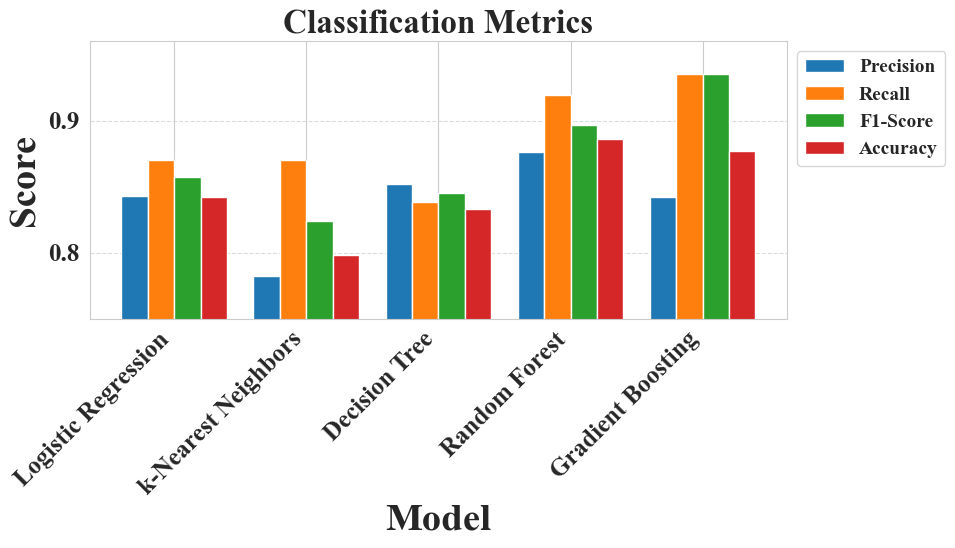

In [137]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
models = ['Logistic Regression', 'k-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
precision = [0.843, 0.782, 0.852, 0.876, 0.842]
recall = [0.870, 0.870, 0.838, 0.919, 0.935]
f1_score = [0.857, 0.824, 0.845, 0.897, 0.935]
accuracy = [0.842, 0.798, 0.833, 0.886, 0.877]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12,6))

rects1 = ax.bar(x - 1.5*width, precision, width, label='Precision')
rects2 = ax.bar(x - 0.5*width, recall, width, label='Recall')
rects3 = ax.bar(x + 0.5*width, f1_score, width, label='F1-Score')
rects4 = ax.bar(x + 1.5*width, accuracy, width, label='Accuracy')




plt.xlabel('Model', fontname='Times New Roman', fontsize=28, fontweight='bold')
plt.ylabel('Score', fontname='Times New Roman', fontsize=28, fontweight='bold')
plt.title('Classification Metrics', fontweight='bold', fontname='Times New Roman', fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(models, fontname='Times New Roman', rotation=45, ha='right', fontweight='bold',fontsize=18)
plt.yticks(fontsize=18, fontweight='bold')  # <-- Here for bold y ticks
ax.set_ylim(0.75, 0.96)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0,0,0.85,1])
plt.savefig("classification Metrics.png", dpi=300, bbox_inches='tight')
plt.show()


#ensemble

In [14]:
pwd

'C:\\Users\\sakthi\\hem'

In [3]:
cd hem

C:\Users\sakthi\hem


In [ ]:
#lipho

In [15]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprintAsBitVect
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor  # 🔥 XGBoost

# Load dataset
df = pd.read_csv("lipinskiras1.csv")

# Columns
SMILES_COLUMN = "smiles"
PIC50_COLUMN = "LogP"

# Convert SMILES to fingerprint
def smiles_to_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

# Apply fingerprinting
df["fingerprint"] = df[SMILES_COLUMN].apply(smiles_to_fingerprint)
df = df.dropna(subset=["fingerprint"])
X = np.vstack(df["fingerprint"].values)
y = df[PIC50_COLUMN].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "SVR (RBF Kernel)": SVR(kernel="rbf", C=1.0, epsilon=0.2),
    "k-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost Regressor": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
}

# Evaluation function
def evaluate_model(name, model, X_test, y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name} - R²: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")
    print("-" * 50)

# Train and evaluate
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluate_model(name, model, X_test, y_test, y_pred)


Training Ridge Regression...
Ridge Regression - R²: 0.9248, MAE: 0.6717, RMSE: 1.0058
--------------------------------------------------
Training Lasso Regression...
Lasso Regression - R²: 0.9253, MAE: 0.7287, RMSE: 1.0024
--------------------------------------------------
Training SVR (RBF Kernel)...
SVR (RBF Kernel) - R²: 0.8393, MAE: 0.9505, RMSE: 1.4700
--------------------------------------------------
Training k-Nearest Neighbors...
k-Nearest Neighbors - R²: 0.9091, MAE: 0.7061, RMSE: 1.1053
--------------------------------------------------
Training Decision Tree...
Decision Tree - R²: 0.9244, MAE: 0.5920, RMSE: 1.0080
--------------------------------------------------
Training Random Forest...
Random Forest - R²: 0.9403, MAE: 0.5533, RMSE: 0.8959
--------------------------------------------------
Training Gradient Boosting...
Gradient Boosting - R²: 0.9397, MAE: 0.6184, RMSE: 0.9006
--------------------------------------------------
Training XGBoost Regressor...
XGBoost Regress

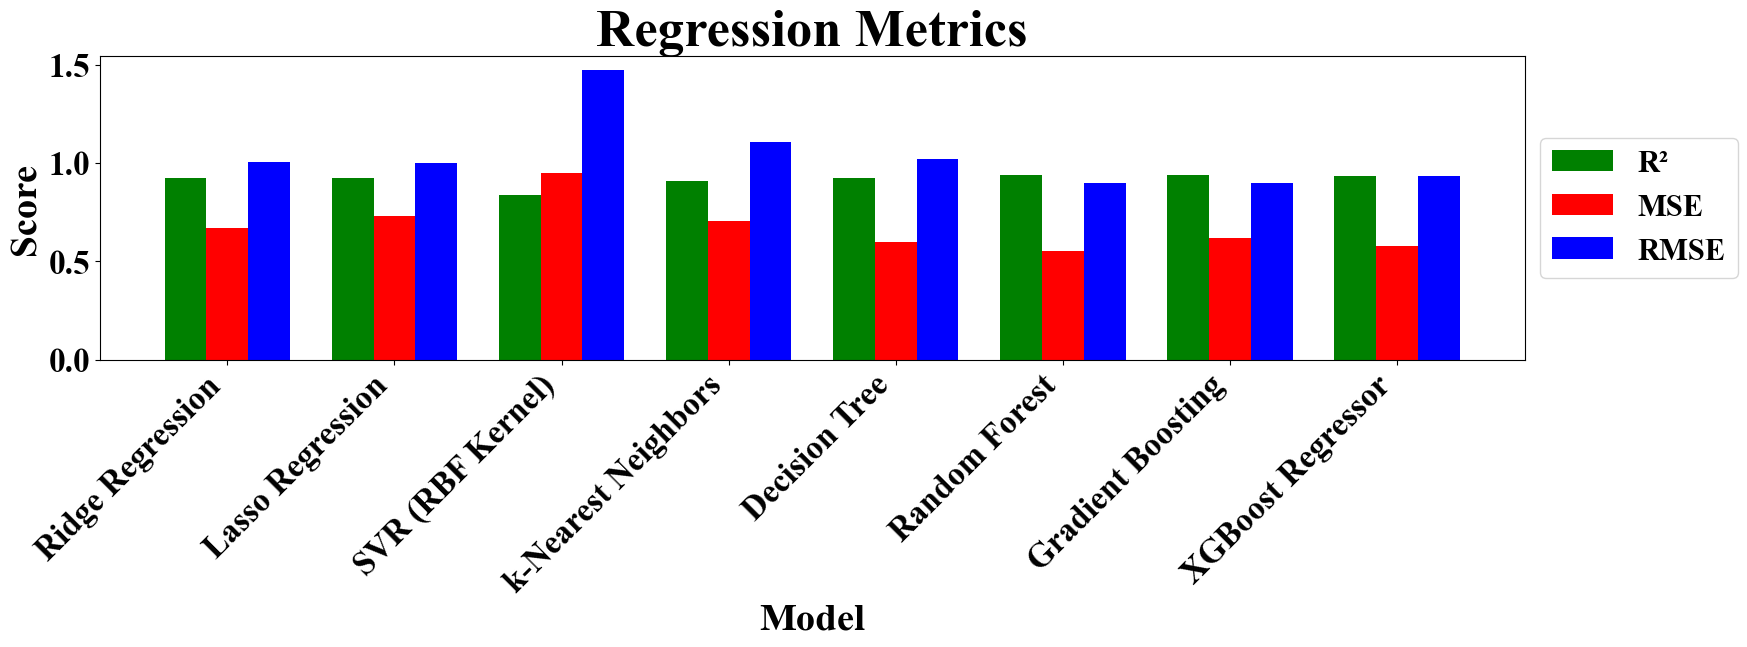

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# --------------------------
# Store results
# --------------------------
results = {
    "Model": [],
    "R2": [],
    "MSE": [],
    "RMSE": []
}

# Evaluate and store metrics
for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results["Model"].append(name)
    results["R2"].append(r2)
    results["MSE"].append(mae)
    results["RMSE"].append(rmse)

# Convert to DataFrame
results_df = pd.DataFrame(results)

# --------------------------
# Set global font
# --------------------------
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 24,
    "font.weight": "bold"
})

# --------------------------
# Grouped bar plot
# --------------------------
x = np.arange(len(results_df["Model"]))  # positions
width = 0.25  # bar width

fig, ax = plt.subplots(figsize=(18, 7))

bars1 = ax.bar(x - width, results_df["R2"], width, label="R²", color="green")
bars2 = ax.bar(x, results_df["MSE"], width, label="MSE", color="red")
bars3 = ax.bar(x + width, results_df["RMSE"], width, label="RMSE", color="blue")

# Labels & title
plt.xlabel('Model', fontname='Times New Roman', fontsize=28, fontweight='bold')
plt.ylabel('Score', fontname='Times New Roman', fontsize=28, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(results_df["Model"], rotation=45, ha="right")

ax.set_title("Regression Metrics", fontsize=38, fontweight="bold")

# Legend outside (same font size)
ax.legend(
    fontsize=22,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=True
)

plt.tight_layout()
plt.savefig("reg_compare_grouped.png", dpi=300, bbox_inches="tight")
plt.show()


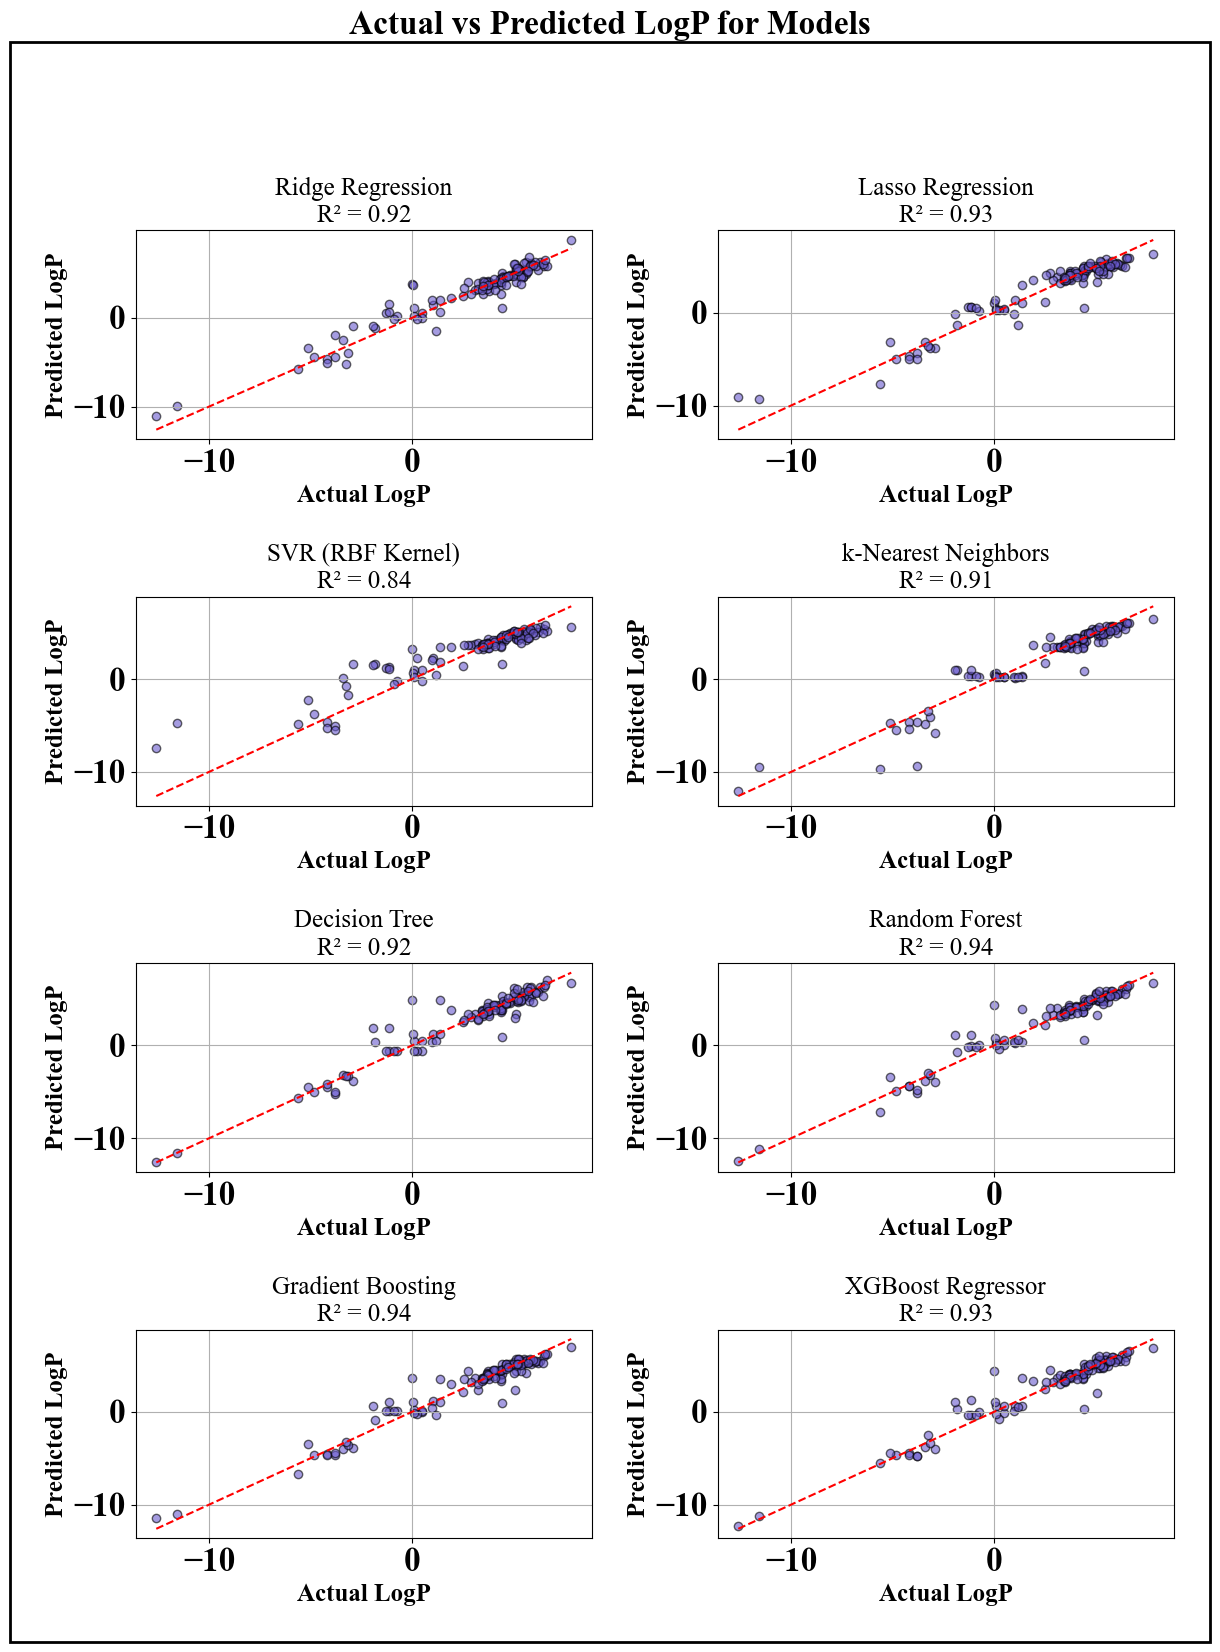

In [17]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.metrics import r2_score

# Create subplots: 4 rows x 2 columns (adjust based on number of models)
n_models = len(models)
n_cols = 2
n_rows = (n_models + 1) // n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
fig.patch.set_facecolor("white")  # White background for the figure

axs = axs.flatten()  # Flatten in case of a single row

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    ax = axs[idx]
    ax.scatter(y_test, y_pred, alpha=0.6, color="slateblue", edgecolors='k')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    ax.set_xlabel("Actual LogP", fontsize=18, fontweight="bold")
    ax.set_ylabel("Predicted LogP", fontsize=18, fontweight="bold")
    ax.set_title(f"{name}\nR² = {r2:.2f}", fontsize=18)
    ax.grid(True)
    ax.set_facecolor("white")  # Set each subplot background to white

# Hide unused subplots if any
for j in range(idx + 1, len(axs)):
    fig.delaxes(axs[j])

# Add a black border around the entire figure
fig.patches.append(Rectangle(
    (0, 0), 1, 1,
    transform=fig.transFigure,
    fill=False,
    edgecolor='black',
    linewidth=2
))

# Add a super title and adjust layout
plt.suptitle("Actual vs Predicted LogP for Models", fontsize=24, y=1.02, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig("actual_vs_predicted_LogP.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


Training Ridge Regression...
Training Lasso Regression...
Training SVR (RBF Kernel)...
Training k-Nearest Neighbors...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost Regressor...
                 Model   Test R2  Test MAE  Test RMSE  CV R2 Mean  CV R2 Std
0     Ridge Regression  0.924763  0.671723   1.005837    0.913001   0.060346
1     Lasso Regression  0.925283  0.728696   1.002356    0.919169   0.014844
2     SVR (RBF Kernel)  0.839311  0.950535   1.469958    0.806156   0.073802
3  k-Nearest Neighbors  0.909148  0.706148   1.105302    0.898355   0.060951
4        Decision Tree  0.922929  0.598184   1.018026    0.914715   0.046044
5        Random Forest  0.940308  0.553306   0.895919    0.953842   0.014059
6    Gradient Boosting  0.939680  0.618419   0.900623    0.950530   0.013614
7    XGBoost Regressor  0.934930  0.580390   0.935415    0.941575   0.030808


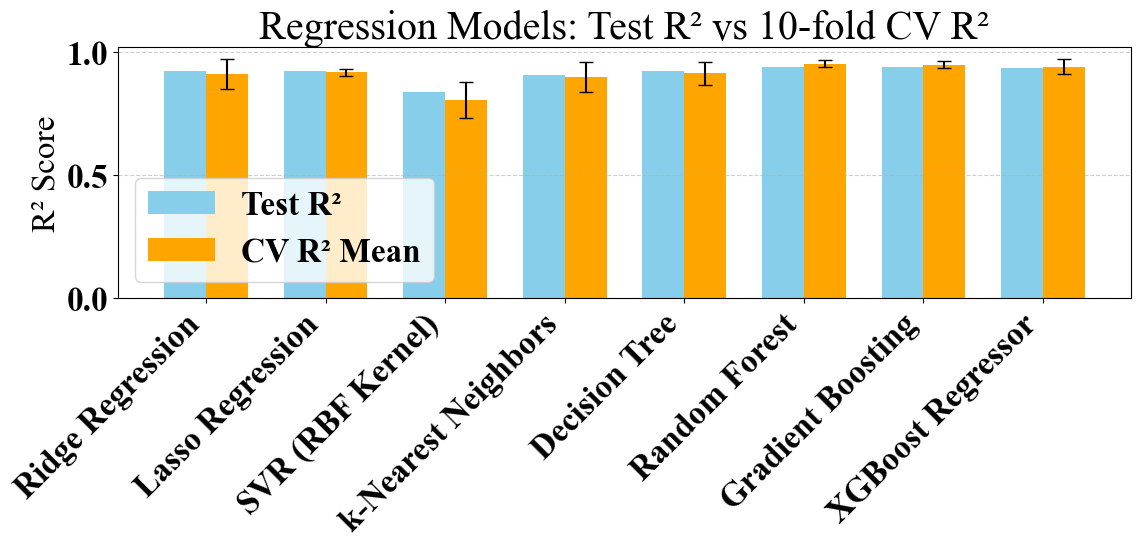

In [22]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprintAsBitVect
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("lipinskiras1.csv")
SMILES_COLUMN = "smiles"
PIC50_COLUMN = "LogP"

# Fingerprint function
def smiles_to_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

# Generate fingerprints
df["fingerprint"] = df[SMILES_COLUMN].apply(smiles_to_fingerprint)
df = df.dropna(subset=["fingerprint"])
X = np.vstack(df["fingerprint"].values)
y = df[PIC50_COLUMN].values

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "SVR (RBF Kernel)": SVR(kernel="rbf", C=1.0, epsilon=0.2),
    "k-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost Regressor": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
}

results = []

# Train, test, and CV
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    # Test metrics
    y_test_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # 10-fold CV
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring="r2")
    cv_r2_mean = np.mean(cv_scores)
    cv_r2_std = np.std(cv_scores)

    results.append({
        "Model": name,
        "Test R2": test_r2,
        "Test MAE": test_mae,
        "Test RMSE": test_rmse,
        "CV R2 Mean": cv_r2_mean,
        "CV R2 Std": cv_r2_std
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Plot Test R² vs CV R²
x = np.arange(len(results_df))
width = 0.35
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(x - width/2, results_df["Test R2"], width, label='Test R²', color='skyblue')
plt.bar(x + width/2, results_df["CV R2 Mean"], width,
        yerr=results_df["CV R2 Std"], label='CV R² Mean', color='orange', capsize=5)
plt.xticks(x, results_df["Model"], rotation=45, ha='right')
plt.ylabel("R² Score")
plt.title("Regression Models: Test R² vs 10-fold CV R²")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("cv10_test_r2_comparison.png", dpi=300)
plt.show()


                 Model  CV R2 Mean  CV R2 Std  CV RMSE Mean  CV RMSE Std  \
0     Ridge Regression    0.930251   0.034493      0.946179     0.280159   
1     Lasso Regression    0.843122   0.069879      1.427836     0.436163   
2     SVR (RBF Kernel)    0.893514   0.069191      1.169770     0.462530   
3  k-Nearest Neighbors    0.914628   0.039056      1.020871     0.255106   
4        Decision Tree    0.893324   0.071868      1.291149     0.605941   
5        Random Forest    0.927351   0.064783      0.913791     0.347292   
6    Gradient Boosting    0.920949   0.062273      0.974957     0.343799   
7    XGBoost Regressor    0.887512   0.153429      1.055462     0.579857   

   CV MSE Mean  CV MSE Std  
0     0.973744    0.481876  
1     2.228953    1.361277  
2     1.582297    1.192205  
3     1.107256    0.521534  
4     2.034229    2.128024  
5     0.955625    0.700301  
6     1.068739    0.710595  
7     1.450233    1.679379  


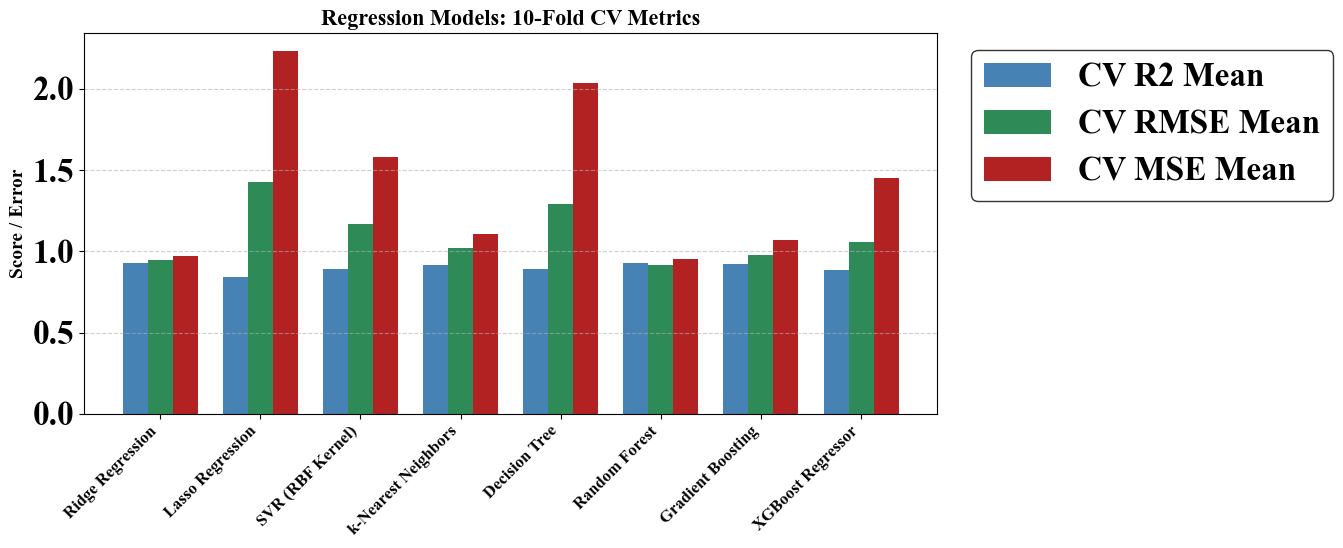

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

# Compute CV metrics for all models
cv_results = []

for name, model in models.items():
    # 10-fold CV R²
    cv_r2 = cross_val_score(model, X, y, cv=10, scoring="r2")
    cv_r2_mean = cv_r2.mean()
    cv_r2_std = cv_r2.std()

    # 10-fold CV RMSE and MSE
    # Use neg_mean_squared_error scoring and take sqrt for RMSE
    cv_mse = -cross_val_score(model, X, y, cv=10, scoring="neg_mean_squared_error")
    cv_rmse = np.sqrt(cv_mse)

    cv_results.append({
        "Model": name,
        "CV R2 Mean": cv_r2_mean,
        "CV R2 Std": cv_r2_std,
        "CV RMSE Mean": cv_rmse.mean(),
        "CV RMSE Std": cv_rmse.std(),
        "CV MSE Mean": cv_mse.mean(),
        "CV MSE Std": cv_mse.std()
    })

cv_df = pd.DataFrame(cv_results)
print(cv_df)

# Plot grouped bar chart
metrics = ["CV R2 Mean", "CV RMSE Mean", "CV MSE Mean"]
colors = ["steelblue", "seagreen", "firebrick"]
x = np.arange(len(cv_df))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + (i-1)*width, cv_df[metric], width, label=metric, color=colors[i])

ax.set_xticks(x)
ax.set_xticklabels(cv_df["Model"], rotation=45, ha='right', fontsize=12)
ax.set_ylabel("Score / Error", fontsize=14, fontweight='bold')
ax.set_title("Regression Models: 10-Fold CV Metrics", fontsize=16, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Legend outside
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), frameon=True, facecolor='white', edgecolor='black')

plt.tight_layout()
plt.savefig("cv10_metrics_r2_rmse_mse.png", dpi=300, bbox_inches='tight')
plt.show()


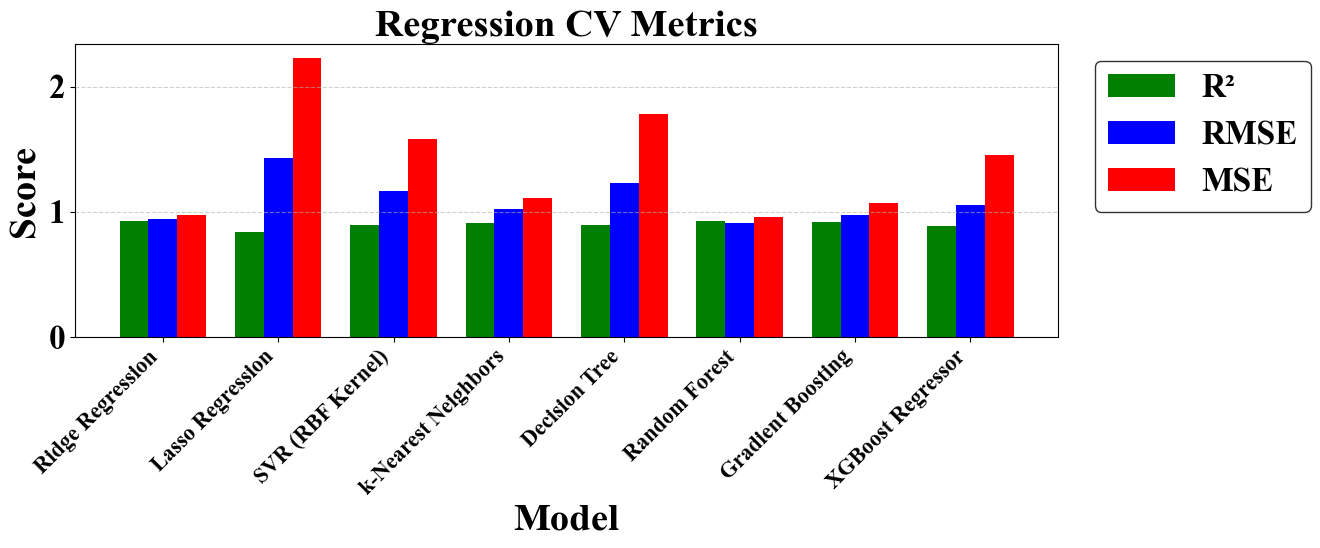

In [31]:
# Plot grouped bar chart with legend outside
metrics = ["CV R2 Mean", "CV RMSE Mean", "CV MSE Mean"]
colors = ["green", "blue", "red"]
labels = ["R²", "RMSE", "MSE"]  # Legend labels
x = np.arange(len(cv_df))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + (i-1)*width, cv_df[metric], width, label=labels[i], color=colors[i])

ax.set_xticks(x)
ax.set_xticklabels(cv_df["Model"], rotation=45, ha='right', fontsize=16)
ax.set_xlabel("Model", fontsize=28, fontweight='bold')
ax.set_ylabel("Score", fontsize=28, fontweight='bold')
ax.set_title("Regression CV Metrics", fontsize=28, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Legend outside
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), frameon=True, facecolor='white', edgecolor='black')

plt.tight_layout()
plt.savefig("cv10_metrics_r2_rmse_mse_legend_outside.png", dpi=300, bbox_inches='tight')
plt.show()


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score

# Store CV results
cv_results = []

for name, model in models.items():
    # 10-fold CV R²
    cv_r2 = cross_val_score(model, X, y, cv=10, scoring="r2")
    cv_r2_mean = cv_r2.mean()
    cv_r2_std = cv_r2.std()

    # 10-fold CV MSE and RMSE
    cv_mse = -cross_val_score(model, X, y, cv=10, scoring="neg_mean_squared_error")
    cv_rmse = np.sqrt(cv_mse)

    cv_results.append({
        "Model": name,
        "CV R2 Mean": cv_r2_mean,
        "CV R2 Std": cv_r2_std,
        "CV RMSE Mean": cv_rmse.mean(),
        "CV RMSE Std": cv_rmse.std(),
        "CV MSE Mean": cv_mse.mean(),
        "CV MSE Std": cv_mse.std()
    })

# Convert to DataFrame
cv_df = pd.DataFrame(cv_results)

# Round for readability
cv_df_round = cv_df.copy()
cv_df_round.iloc[:, 1:] = cv_df_round.iloc[:, 1:].round(4)

# Display table
print(cv_df_round)

# Optional: save as CSV
cv_df_round.to_csv("cv_metrics_table.csv", index=False)


                 Model  CV R2 Mean  CV R2 Std  CV RMSE Mean  CV RMSE Std  \
0     Ridge Regression      0.9303     0.0345        0.9462       0.2802   
1     Lasso Regression      0.8431     0.0699        1.4278       0.4362   
2     SVR (RBF Kernel)      0.8935     0.0692        1.1698       0.4625   
3  k-Nearest Neighbors      0.9146     0.0391        1.0209       0.2551   
4        Decision Tree      0.8981     0.0556        1.2289       0.5214   
5        Random Forest      0.9274     0.0648        0.9138       0.3473   
6    Gradient Boosting      0.9209     0.0623        0.9750       0.3438   
7    XGBoost Regressor      0.8875     0.1534        1.0555       0.5799   

   CV MSE Mean  CV MSE Std  
0       0.9737      0.4819  
1       2.2290      1.3613  
2       1.5823      1.1922  
3       1.1073      0.5215  
4       1.7820      1.5866  
5       0.9556      0.7003  
6       1.0687      0.7106  
7       1.4502      1.6794  
